In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
x_train=pd.read_csv('Diabetes_XTrain.csv')
y_train=pd.read_csv('Diabetes_YTrain.csv')
x_test=pd.read_csv('Diabetes_XTest.csv')
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [179]:
y_train

,Outcome
0,1
1,0
2,1
3,1
4,0
...,...
571,0
572,1
573,0
574,0


In [180]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22
...,...,...,...,...,...,...,...,...
187,10,108,66,0,0,32.4,0.272,42
188,3,130,64,0,0,23.1,0.314,22
189,0,162,76,36,0,49.6,0.364,26
190,12,84,72,31,0,29.7,0.297,46


Text(0, 0.5, 'No. of patients')

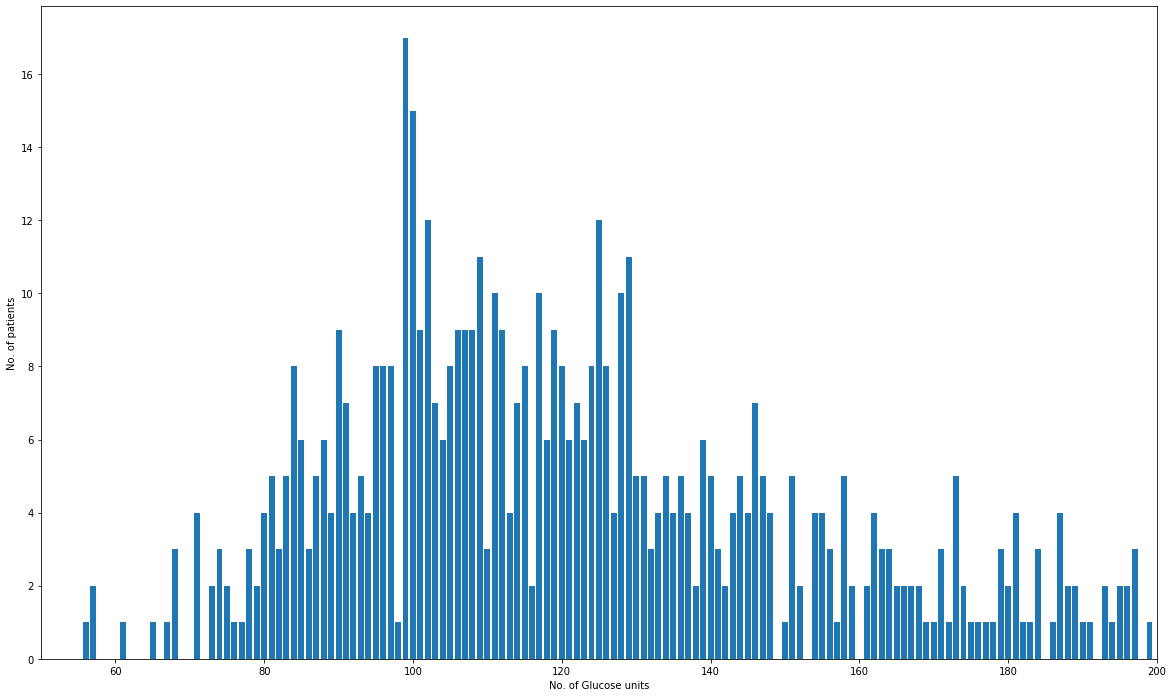

In [181]:
plt.figure(figsize=(20,12))
plt.bar(x_train['Glucose'].value_counts().index,x_train['Glucose'].value_counts().values)
plt.xlim(50,200)
plt.xlabel('No. of Glucose units')
plt.ylabel('No. of patients')

Text(0, 0.5, 'No. of patients')

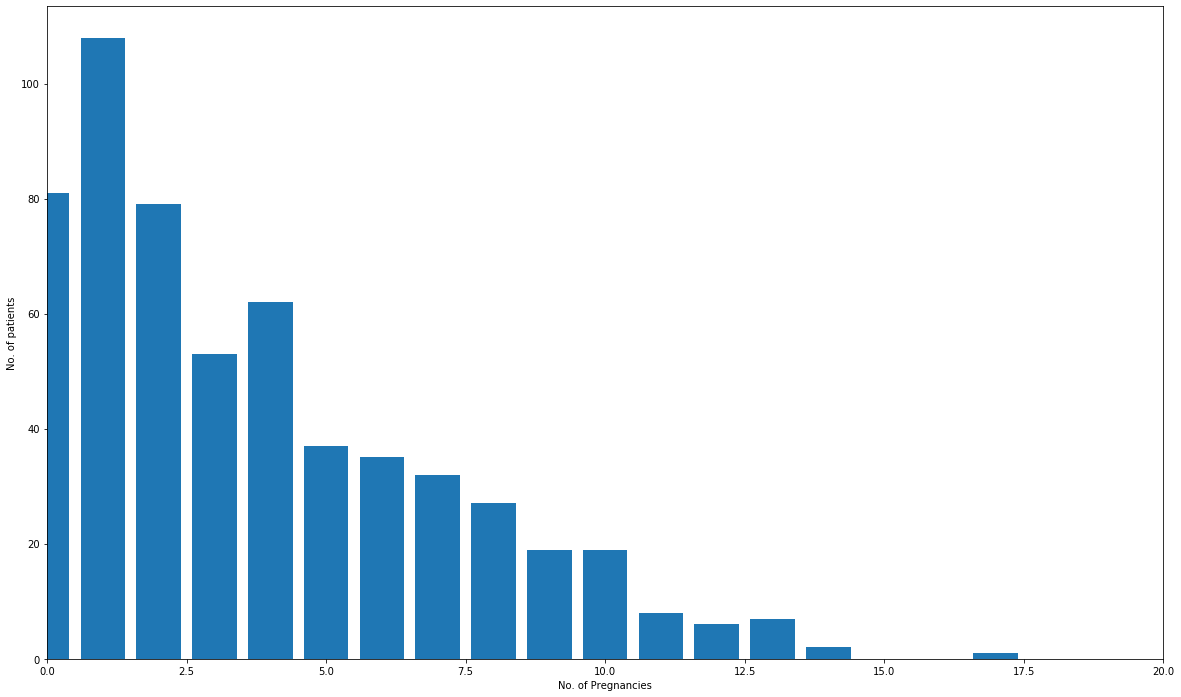

In [182]:
plt.figure(figsize=(20,12))
plt.bar(x_train['Pregnancies'].value_counts().index,x_train['Pregnancies'].value_counts().values)
plt.xlim(0,20)
plt.xlabel('No. of Pregnancies')
plt.ylabel('No. of patients')

Text(0, 0.5, 'No. of patients')

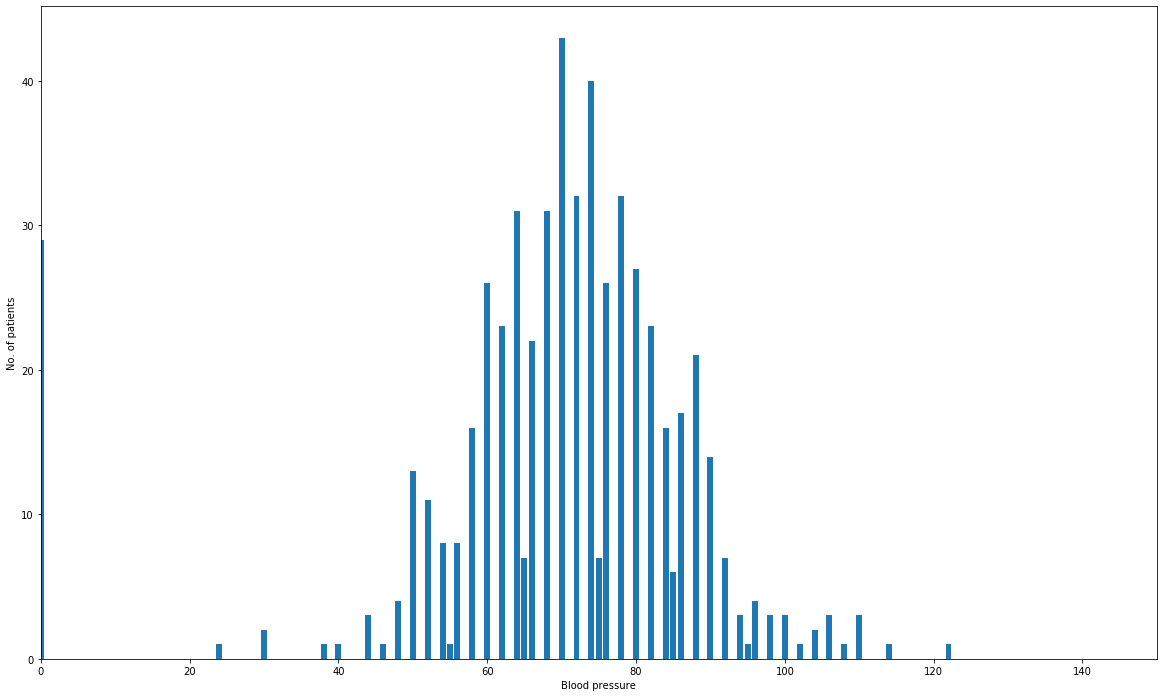

In [183]:
plt.figure(figsize=(20,12))
plt.bar(x_train['BloodPressure'].value_counts().index,x_train['BloodPressure'].value_counts().values)
plt.xlim(0,150)
plt.xlabel('Blood pressure')
plt.ylabel('No. of patients')

Text(0, 0.5, 'No. of patients')

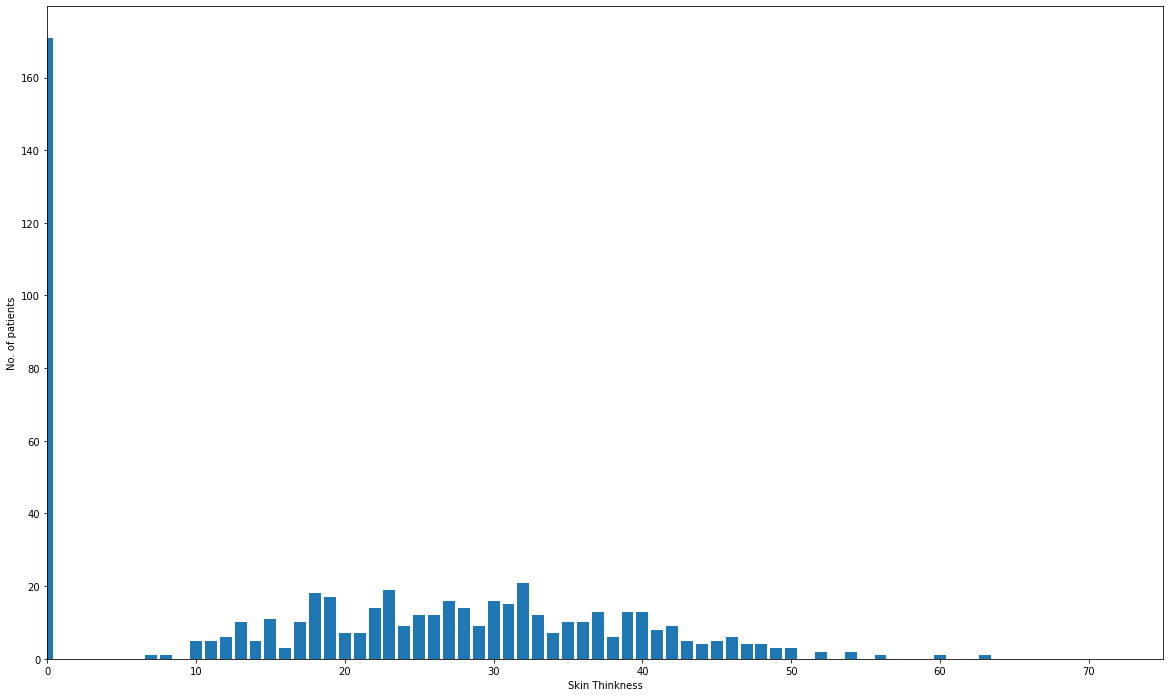

In [184]:
plt.figure(figsize=(20,12))
plt.bar(x_train['SkinThickness'].value_counts().index,x_train['SkinThickness'].value_counts().values)
plt.xlim(0,75)
plt.xlabel('Skin Thinkness')
plt.ylabel('No. of patients')

Text(0, 0.5, 'No. of patients')

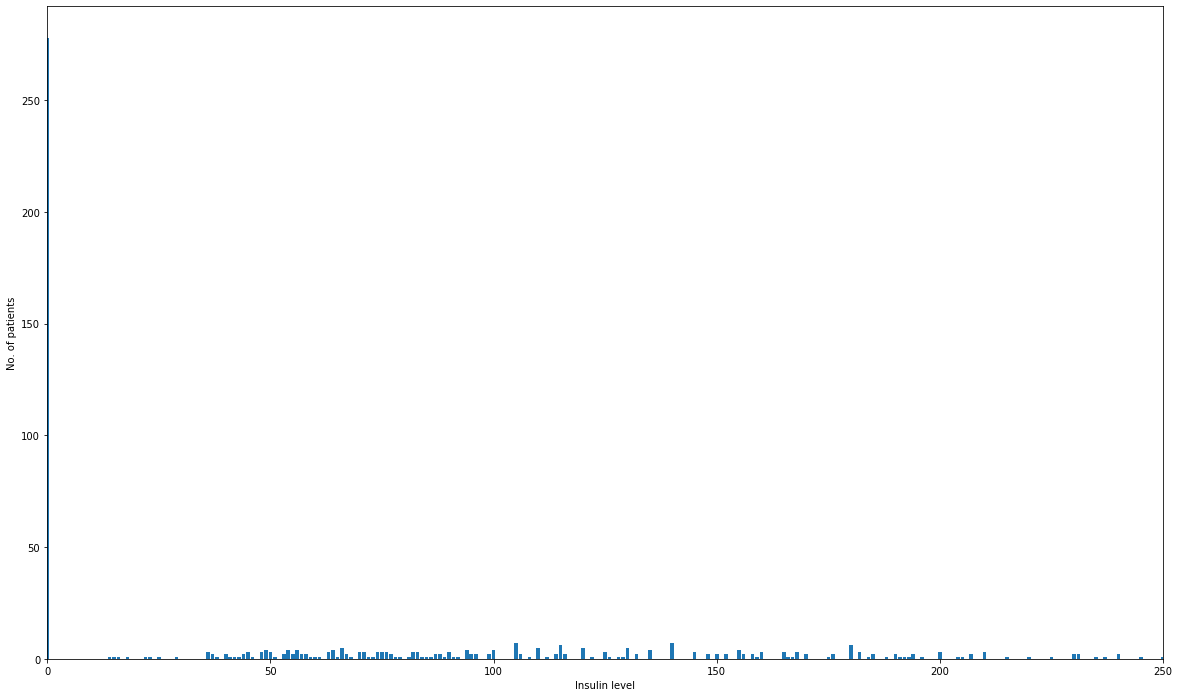

In [185]:
plt.figure(figsize=(20,12))
plt.bar(x_train['Insulin'].value_counts().index,x_train['Insulin'].value_counts().values)
plt.xlim(0,250)
plt.xlabel('Insulin level')
plt.ylabel('No. of patients')

Text(0, 0.5, 'No. of patients')

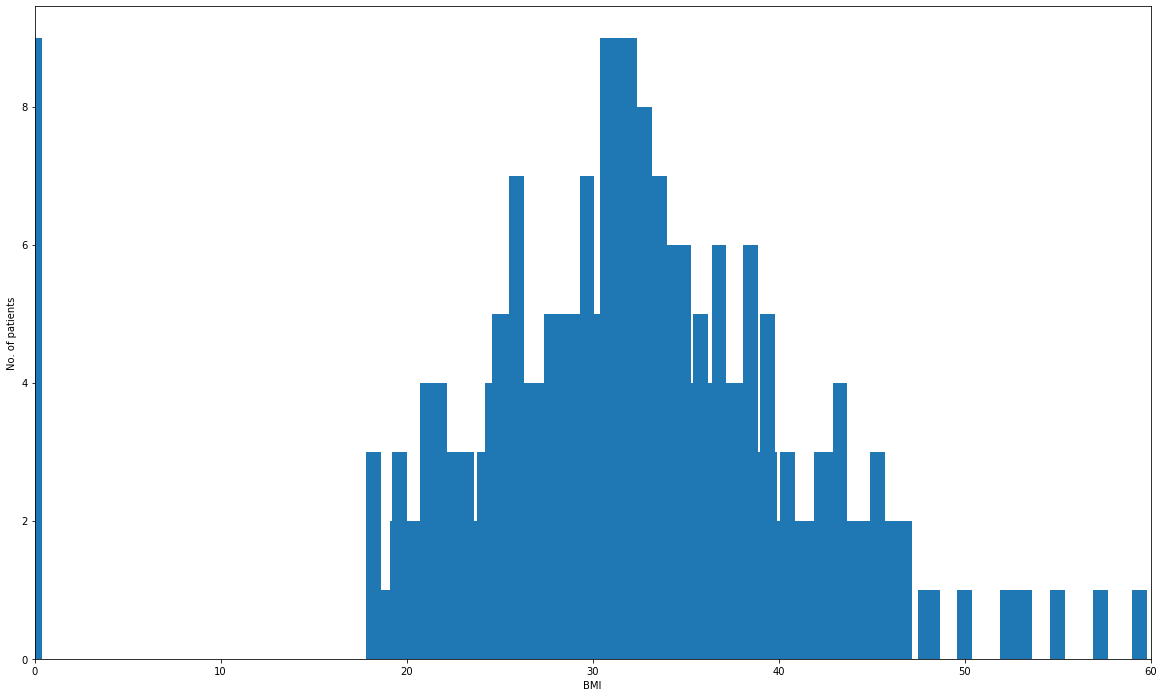

In [186]:
plt.figure(figsize=(20,12))
plt.bar(x_train['BMI'].value_counts().index,x_train['BMI'].value_counts().values)
plt.xlim(0,60)
plt.xlabel('BMI')
plt.ylabel('No. of patients')

Text(0, 0.5, 'No. of patients')

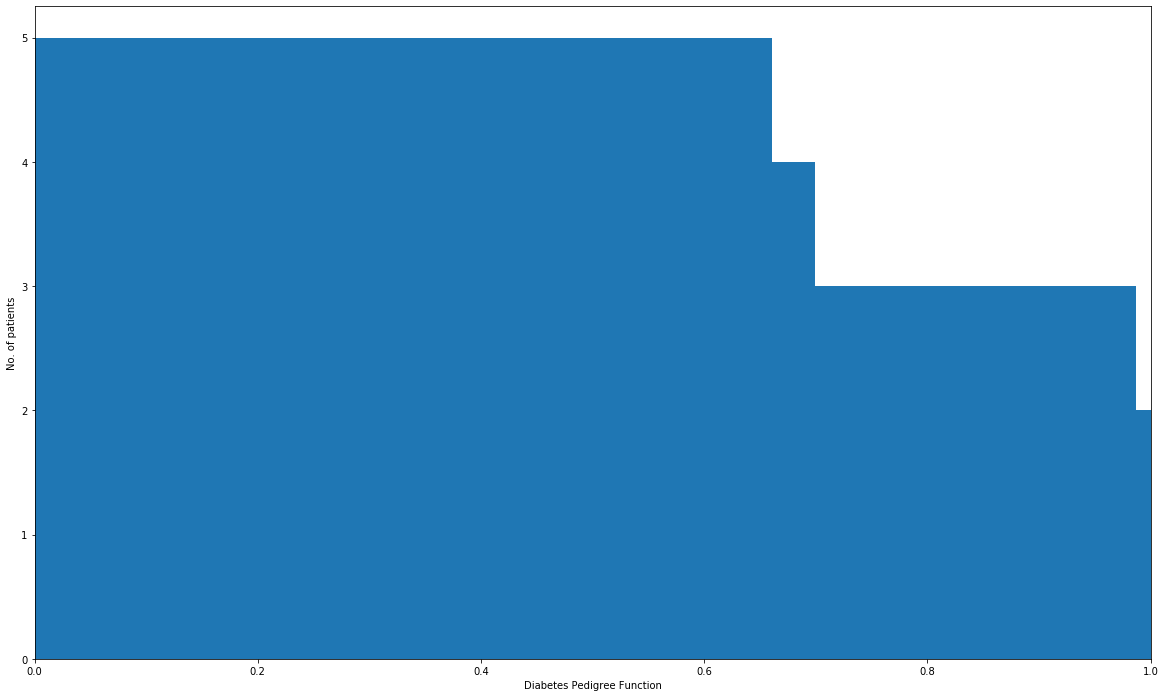

In [187]:
plt.figure(figsize=(20,12))
plt.bar(x_train['DiabetesPedigreeFunction'].value_counts().index,x_train['DiabetesPedigreeFunction'].value_counts().values)
plt.xlim(0,1)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('No. of patients')

Text(0, 0.5, 'No. of patients')

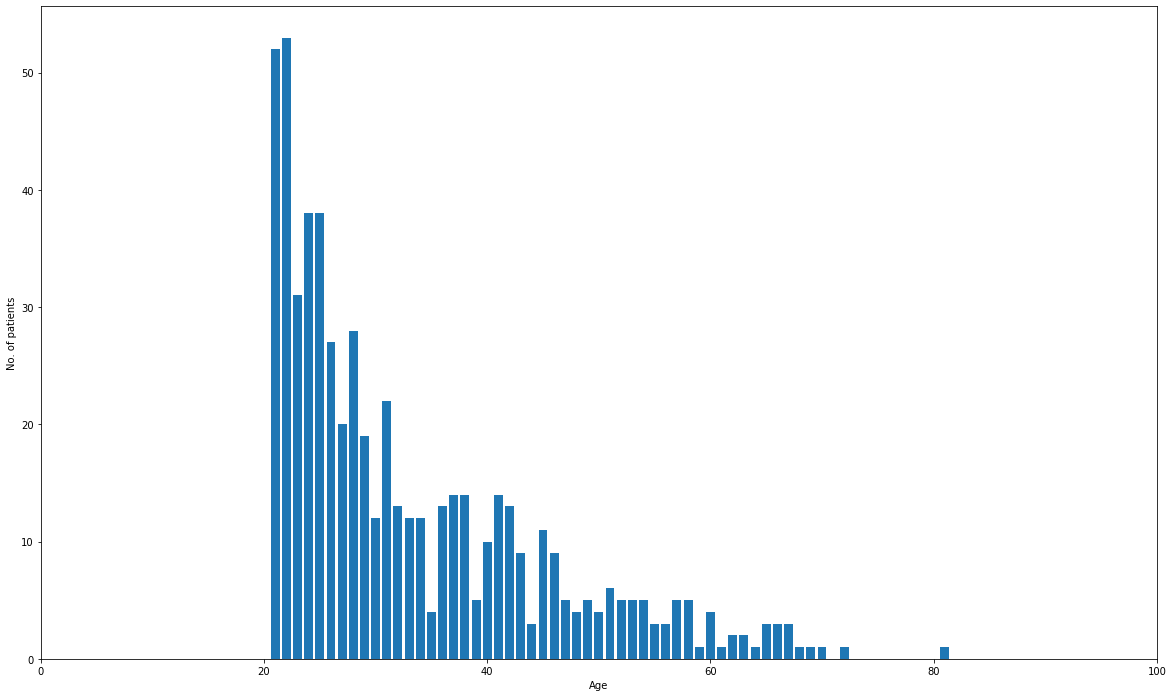

In [188]:
plt.figure(figsize=(20,12))
plt.bar(x_train['Age'].value_counts().index,x_train['Age'].value_counts().values)
plt.xlim(0,100)
plt.xlabel('Age')
plt.ylabel('No. of patients')

In [189]:
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values


In [190]:
#Distance calculation
def distance(x1,x2):
    return (np.sqrt(np.sum((x1-x2)**2)))


In [191]:
#Knn model
def knn(x_train,y_train,x_test,k=17):
    dist=[]
    
    for i in range(x_train.shape[0]):
        d=distance(x_train[i],x_test)
        dist.append((d,y_train[i]))
    dist=sorted(dist)
    dist=dist[:k]
    my_dist=np.array(dist)
    my_unique=np.unique(my_dist,return_counts=True)
    index=my_unique[1].argmax()
    pred=my_unique[0][index]
    return pred
    

In [192]:
#Testing model
pred=[]
for i in range(x_test.shape[0]):
    my_pred=knn(x_train,y_train,x_test[i])
    pred.append(my_pred)
my_df=pd.DataFrame(pred)


In [193]:
my_df.columns=['Predicted Outcome']

In [194]:
my_df.head(15)

,Predicted Outcome
0,1
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [195]:
my_df

,Predicted Outcome
0,1
1,0
2,0
3,0
4,0
...,...
187,0
188,0
189,1
190,0


In [196]:
my_df.to_csv('my_Prediction.csv')

In [197]:
#Barplot representation
x_test=pd.DataFrame(x_test)
my_df=np.array(my_df)
x_test_0=x_test.loc[(my_df==0)]
x_test_1=x_test.loc[(my_df==1)]
count_0=0
count_1=0
for i in range(len(my_df)):
    if(my_df[i]==0):
        count_0+=1
    else:
        count_1+=1

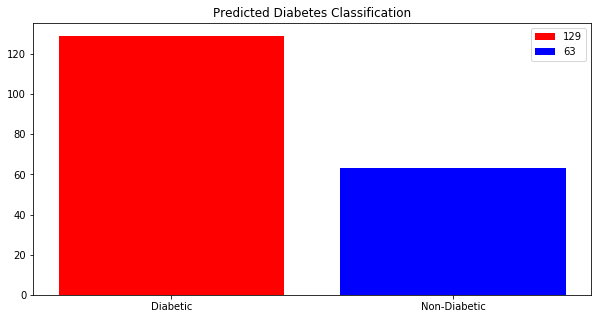

In [198]:
fig=plt.figure(figsize=(10,5))
tick_labels=['Diabetic','Non-Diabetic']
a=plt.bar(tick_labels,[count_0,count_1],color=['red','blue'])
plt.title('Predicted Diabetes Classification')
plt.legend(iter(a), (count_0,count_1))
plt.show()
